## **Import libraries and data**

In [2]:
import sklearn  
import pandas as pd  
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## API extraction for prices

In [6]:
import requests

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

#Aux function to do monthly requests

def generate_monthly_ranges(start_date, end_date):
    # Parse the input start and end dates
    start = datetime.strptime(start_date, "%Y-%m-%dT%H")
    end = datetime.strptime(end_date, "%Y-%m-%dT%H")
    
    # Initialize the first month start and end dates
    current_start = start
    
    while current_start <= end:
        # Get the last day of the current month
        current_end = (current_start + relativedelta(months=1) - timedelta(days=1)).replace(hour=23)
        
        # Ensure we don't go past the actual end date
        if current_end > end:
            current_end = end
        
        # Format as required for the API request
        yield current_start.strftime("%Y-%m-%dT%H"), current_end.strftime("%Y-%m-%dT%H")
        
        # Move to the next month
        current_start = (current_start + relativedelta(months=1)).replace(hour=0)

prices_DA = pd.DataFrame()

#API request

indicator = '600' #From esios website
API_TOKEN = 'fb3872756c312e32fa40585dbbbbc3c156261c2bfc734f2adfc6d6cfd9c7dd93' #Requested by email

headers = {'Host': 'api.esios.ree.es',
           'x-api-key': API_TOKEN}

URL_BASE = 'https://api.esios.ree.es/'
ENDPOINT = 'indicators/'
url = URL_BASE + ENDPOINT + indicator


# Data rquest on monthly basis
start_date = '2014-01-01T00'
end_date = '2024-10-12T23'

for date1, date2 in generate_monthly_ranges(start_date, end_date):

    print(date1, date2)
    
    params = {'start_date': date1,
            'end_date': date2}

    request = requests.get(url, headers=headers, params=params)
    data = request.json()
    aux_df = pd.DataFrame(data['indicator']['values'])
    aux_df = aux_df[['datetime','datetime_utc', 'geo_id', 'geo_name', 'value']]
    aux_df =aux_df.loc[aux_df['geo_name'] == 'España'] # Filter Spain
    prices_DA = pd.concat([prices_DA,aux_df],ignore_index=True)

2014-01-01T00 2014-01-31T23
2014-02-01T00 2014-02-28T23
2014-03-01T00 2014-03-31T23
2014-04-01T00 2014-04-30T23
2014-05-01T00 2014-05-31T23
2014-06-01T00 2014-06-30T23
2014-07-01T00 2014-07-31T23
2014-08-01T00 2014-08-31T23
2014-09-01T00 2014-09-30T23
2014-10-01T00 2014-10-31T23
2014-11-01T00 2014-11-30T23
2014-12-01T00 2014-12-31T23
2015-01-01T00 2015-01-31T23
2015-02-01T00 2015-02-28T23
2015-03-01T00 2015-03-31T23
2015-04-01T00 2015-04-30T23
2015-05-01T00 2015-05-31T23
2015-06-01T00 2015-06-30T23
2015-07-01T00 2015-07-31T23
2015-08-01T00 2015-08-31T23
2015-09-01T00 2015-09-30T23
2015-10-01T00 2015-10-31T23
2015-11-01T00 2015-11-30T23
2015-12-01T00 2015-12-31T23
2016-01-01T00 2016-01-31T23
2016-02-01T00 2016-02-29T23
2016-03-01T00 2016-03-31T23
2016-04-01T00 2016-04-30T23
2016-05-01T00 2016-05-31T23
2016-06-01T00 2016-06-30T23
2016-07-01T00 2016-07-31T23
2016-08-01T00 2016-08-31T23
2016-09-01T00 2016-09-30T23
2016-10-01T00 2016-10-31T23
2016-11-01T00 2016-11-30T23
2016-12-01T00 2016-1

## Solar API data extraction

In [3]:
import requests

indicator = '10034' # From esios website
API_TOKEN = 'fb3872756c312e32fa40585dbbbbc3c156261c2bfc734f2adfc6d6cfd9c7dd93'

headers = {'Host': 'api.esios.ree.es',
           'x-api-key': API_TOKEN}

URL_BASE = 'https://api.esios.ree.es/'
ENDPOINT = 'indicators/'
url = URL_BASE + ENDPOINT + indicator

solar_forecasted = pd.DataFrame()
aux_df = pd.DataFrame()

#dates for download year by year
dates = [('2014-01-01T00', '2014-12-31T23'),
         ('2015-01-01T00', '2015-12-31T23'),
         ('2016-01-01T00', '2016-12-31T23'),
         ('2017-01-01T00', '2017-12-31T23'),
         ('2018-01-01T00', '2018-12-31T23'),
         ('2019-01-01T00', '2019-12-31T23'),
         ('2020-01-01T00', '2020-12-31T23'),
         ('2021-01-01T00', '2021-12-31T23'),
         ('2022-01-01T00', '2022-12-31T23'),
         ('2023-01-01T00', '2023-12-31T23'),
         ('2024-01-01T00', '2024-10-12T23')
         ]


for start_date, end_date in dates:
    print(start_date, end_date)
    
    params = {'start_date': start_date,
            'end_date': end_date,
            'time_agg': 'avg', #agregate through average (it's in MW)
            'time_trunc': 'hour'} #aggregate to hourly level
    
    request = requests.get(url, headers=headers, params=params)
    data = request.json()
    aux_df = pd.DataFrame(data['indicator']['values'])
    aux_df = aux_df[['datetime','datetime_utc', 'geo_id', 'geo_name', 'value']]
    
    solar_forecasted = pd.concat([solar_forecasted,aux_df],ignore_index=True)

2014-01-01T00 2014-12-31T23
2015-01-01T00 2015-12-31T23
2016-01-01T00 2016-12-31T23
2017-01-01T00 2017-12-31T23
2018-01-01T00 2018-12-31T23
2019-01-01T00 2019-12-31T23
2020-01-01T00 2020-12-31T23
2021-01-01T00 2021-12-31T23
2022-01-01T00 2022-12-31T23
2023-01-01T00 2023-12-31T23
2024-01-01T00 2024-10-12T23


## Wind API data extraction

In [7]:
indicator = '541' # From esios website
API_TOKEN = 'fb3872756c312e32fa40585dbbbbc3c156261c2bfc734f2adfc6d6cfd9c7dd93'

headers = {'Host': 'api.esios.ree.es',
           'x-api-key': API_TOKEN}

URL_BASE = 'https://api.esios.ree.es/'
ENDPOINT = 'indicators/'
url = URL_BASE + ENDPOINT + indicator

wind_forecasted = pd.DataFrame()
aux_df = pd.DataFrame()

for start_date, end_date in dates:
    print(start_date, end_date)
    
    params = {'start_date': start_date,
            'end_date': end_date,
            'time_agg': 'avg', #agregate through average (it's in MW)
            'time_trunc': 'hour'} #aggregate to hourly level
    
    request = requests.get(url, headers=headers, params=params)
    data = request.json()
    aux_df = pd.DataFrame(data['indicator']['values'])
    aux_df = aux_df[['datetime','datetime_utc', 'geo_id', 'geo_name', 'value']]
    
    wind_forecasted = pd.concat([wind_forecasted,aux_df],ignore_index=True)

2014-01-01T00 2014-12-31T23
2015-01-01T00 2015-12-31T23
2016-01-01T00 2016-12-31T23
2017-01-01T00 2017-12-31T23
2018-01-01T00 2018-12-31T23
2019-01-01T00 2019-12-31T23
2020-01-01T00 2020-12-31T23
2021-01-01T00 2021-12-31T23
2022-01-01T00 2022-12-31T23
2023-01-01T00 2023-12-31T23
2024-01-01T00 2024-10-12T23


## Solar thermal API extraction

In [8]:
indicator = '543' # From esios website
API_TOKEN = 'fb3872756c312e32fa40585dbbbbc3c156261c2bfc734f2adfc6d6cfd9c7dd93'

headers = {'Host': 'api.esios.ree.es',
           'x-api-key': API_TOKEN}

URL_BASE = 'https://api.esios.ree.es/'
ENDPOINT = 'indicators/'
url = URL_BASE + ENDPOINT + indicator

solarth_forecasted = pd.DataFrame()
aux_df = pd.DataFrame()

for start_date, end_date in dates:
    print(start_date, end_date)
    
    params = {'start_date': start_date,
            'end_date': end_date,
            'time_agg': 'avg', #agregate through average (it's in MW)
            'time_trunc': 'hour'} #aggregate to hourly level
    
    request = requests.get(url, headers=headers, params=params)
    data = request.json()
    aux_df = pd.DataFrame(data['indicator']['values'])
    aux_df = aux_df[['datetime','datetime_utc', 'geo_id', 'geo_name', 'value']]
    
    solarth_forecasted = pd.concat([solarth_forecasted,aux_df],ignore_index=True)

2014-01-01T00 2014-12-31T23
2015-01-01T00 2015-12-31T23
2016-01-01T00 2016-12-31T23
2017-01-01T00 2017-12-31T23
2018-01-01T00 2018-12-31T23
2019-01-01T00 2019-12-31T23
2020-01-01T00 2020-12-31T23
2021-01-01T00 2021-12-31T23
2022-01-01T00 2022-12-31T23
2023-01-01T00 2023-12-31T23
2024-01-01T00 2024-10-12T23


## Previsible demand API extraction

In [9]:
indicator = '544' # From esios website
API_TOKEN = 'fb3872756c312e32fa40585dbbbbc3c156261c2bfc734f2adfc6d6cfd9c7dd93'

headers = {'Host': 'api.esios.ree.es',
           'x-api-key': API_TOKEN}

URL_BASE = 'https://api.esios.ree.es/'
ENDPOINT = 'indicators/'
url = URL_BASE + ENDPOINT + indicator

prev_demand = pd.DataFrame()
aux_df = pd.DataFrame()

for start_date, end_date in dates:
    print(start_date, end_date)
    
    params = {'start_date': start_date,
            'end_date': end_date,
            'time_agg': 'avg', #agregate through average (it's in MW)
            'time_trunc': 'hour'} #aggregate to hourly level
    
    request = requests.get(url, headers=headers, params=params)
    data = request.json()
    aux_df = pd.DataFrame(data['indicator']['values'])
    aux_df = aux_df[['datetime','datetime_utc', 'geo_id', 'geo_name', 'value']]
    
    prev_demand = pd.concat([prev_demand,aux_df],ignore_index=True)

2014-01-01T00 2014-12-31T23
2015-01-01T00 2015-12-31T23
2016-01-01T00 2016-12-31T23
2017-01-01T00 2017-12-31T23
2018-01-01T00 2018-12-31T23
2019-01-01T00 2019-12-31T23
2020-01-01T00 2020-12-31T23
2021-01-01T00 2021-12-31T23
2022-01-01T00 2022-12-31T23
2023-01-01T00 2023-12-31T23
2024-01-01T00 2024-10-12T23


## Pre-processing of datasets
Change to datetime and also remove the timezone, keeping the local timezone, not the UTC one

In [15]:
#Change to datetime
solar_forecasted['datetime'] = pd.to_datetime(solar_forecasted['datetime']) 
wind_forecasted['datetime'] = pd.to_datetime(wind_forecasted['datetime'])
solarth_forecasted['datetime'] = pd.to_datetime(solarth_forecasted['datetime'])
prev_demand['datetime'] = pd.to_datetime(prev_demand['datetime'])
prices_DA['datetime'] = pd.to_datetime(prices_DA['datetime'])

#Remove timezone info
solar_forecasted['datetime'] = solar_forecasted['datetime'].apply(lambda x: x.replace(tzinfo=None))
wind_forecasted['datetime'] = wind_forecasted['datetime'].apply(lambda x: x.replace(tzinfo=None))
solarth_forecasted['datetime'] = solarth_forecasted['datetime'].apply(lambda x: x.replace(tzinfo=None))
prev_demand['datetime'] = prev_demand['datetime'].apply(lambda x: x.replace(tzinfo=None))
prices_DA['datetime'] = prices_DA['datetime'].apply(lambda x: x.replace(tzinfo=None))


Check for duplicates, they appear on October, when summer time shifts to winter time

In [16]:
duplicates = solarth_forecasted[solarth_forecasted.duplicated(subset='datetime',keep=False)]
duplicates

,datetime,datetime_utc,geo_id,geo_name,value
7153,2014-10-26 02:00:00,2014-10-26T00:00:00Z,8741,Península,15.000
7154,2014-10-26 02:00:00,2014-10-26T01:00:00Z,8741,Península,14.800
15889,2015-10-25 02:00:00,2015-10-25T00:00:00Z,8741,Península,7.100
15890,2015-10-25 02:00:00,2015-10-25T01:00:00Z,8741,Península,2.500
24793,2016-10-30 02:00:00,2016-10-30T00:00:00Z,8741,Península,60.400
24794,2016-10-30 02:00:00,2016-10-30T01:00:00Z,8741,Península,9.200
33529,2017-10-29 02:00:00,2017-10-29T00:00:00Z,8741,Península,59.100
33530,2017-10-29 02:00:00,2017-10-29T01:00:00Z,8741,Península,47.100
42265,2018-10-28 02:00:00,2018-10-28T00:00:00Z,8741,Península,0.900
42266,2018-10-28 02:00:00,2018-10-28T01:00:00Z,8741,Península,1.300


In [17]:
#Remove duplicates, keep last value
solar_forecasted = solar_forecasted.drop_duplicates(subset='datetime', keep='last')
solarth_forecasted = solarth_forecasted.drop_duplicates(subset='datetime', keep='last')
wind_forecasted = wind_forecasted.drop_duplicates(subset='datetime', keep='last')
prev_demand = prev_demand.drop_duplicates(subset='datetime', keep='last')
prices_DA = prices_DA.drop_duplicates(subset='datetime', keep='last')

#Set datetime as index
solar_forecasted.set_index('datetime', inplace=True)
solarth_forecasted.set_index('datetime', inplace=True)
wind_forecasted.set_index('datetime', inplace=True)
prev_demand.set_index('datetime', inplace=True)
prices_DA.set_index('datetime', inplace=True)

#Full range of hourly times
full_range = pd.date_range(start=solar_forecasted.index.min(), end=solar_forecasted.index.max(), freq='H')
full_range

#Reindex the prices to the new full range
solar_forecasted_full = solar_forecasted.reindex(full_range)
solarth_forecasted_full = solarth_forecasted.reindex(full_range)
wind_forecasted_full = wind_forecasted.reindex(full_range)
prev_demand_full = prev_demand.reindex(full_range)
prices_DA_full = prices_DA_full.reindex(full_range)


Some graphs of daily hourly profiles just to see if the data makes sense...

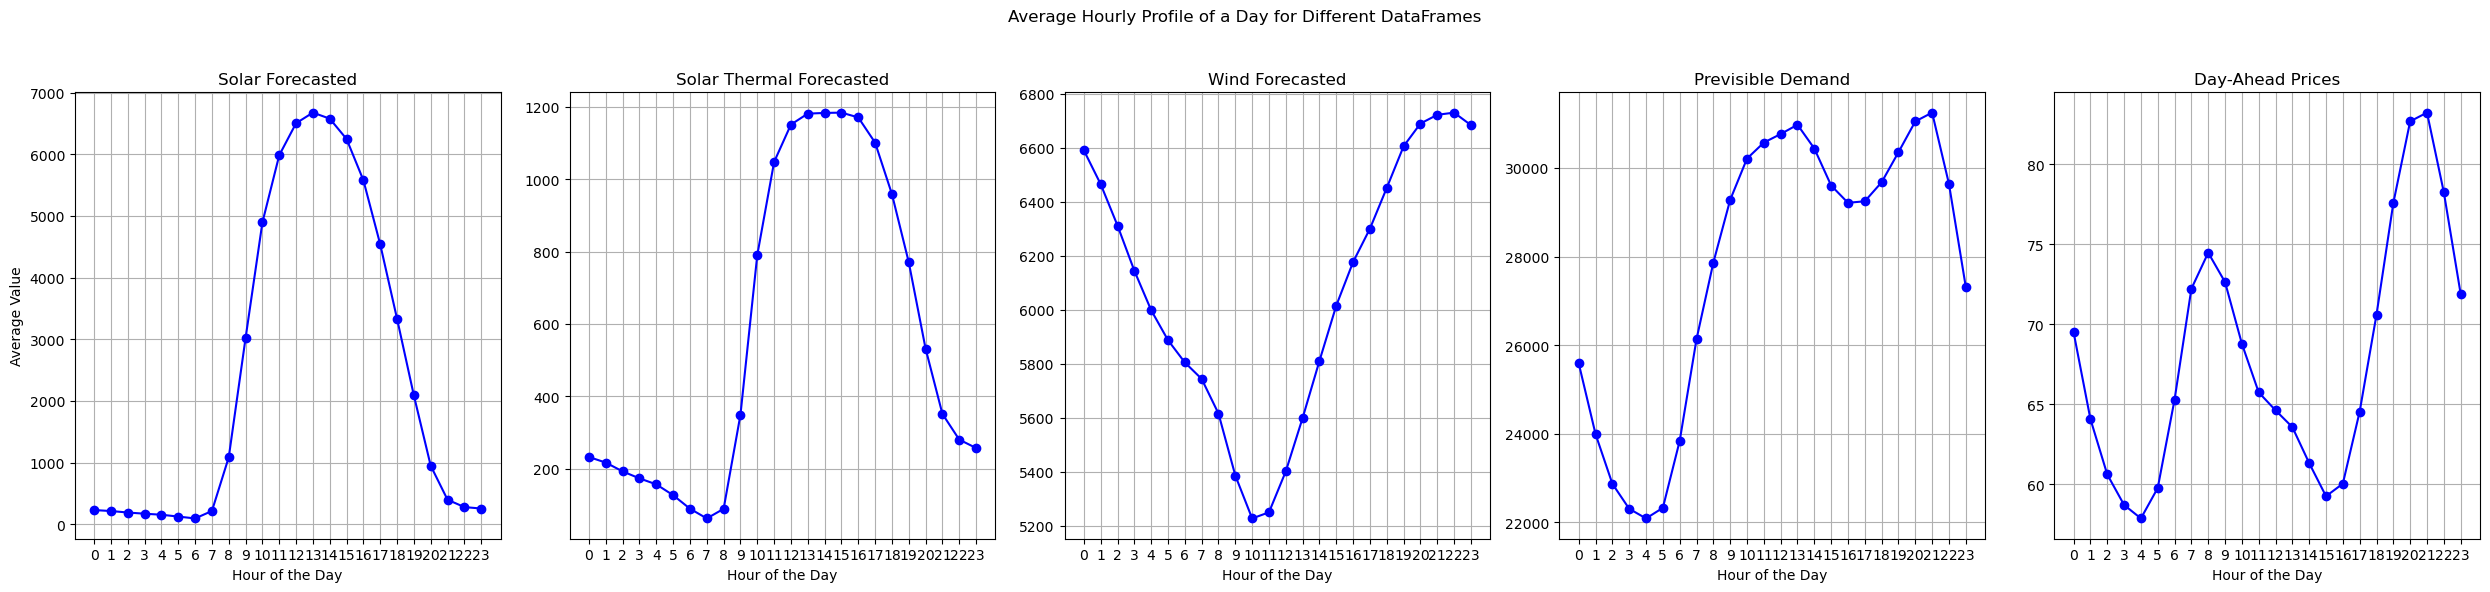

In [26]:
import matplotlib.pyplot as plt

# List of DataFrames and their titles for easy looping
dataframes = [
    (solar_forecasted_full, "Solar Forecasted"),
    (solarth_forecasted_full, "Solar Thermal Forecasted"),
    (wind_forecasted_full, "Wind Forecasted"),
    (prev_demand_full, "Previsible Demand"),
    (prices_DA_full, "Day-Ahead Prices")
]

# Set up a 1x5 subplot grid
fig, axs = plt.subplots(1, 5, figsize=(25, 6))
fig.suptitle("Average Hourly Profile of a Day for Different DataFrames")

# Loop over each DataFrame, calculate the average hourly profile, and plot
for i, (df, title) in enumerate(dataframes):
    # Group by hour of the day and calculate the mean for each hour
    average_hourly_profile = df.groupby(df.index.hour)['value'].mean()
    
    # Plot on the corresponding subplot
    axs[i].plot(average_hourly_profile, marker='o', color='b')
    axs[i].set_title(title)
    axs[i].set_xlabel("Hour of the Day")
    axs[i].set_xticks(range(0, 24))
    axs[i].grid(True)

# Set a common y-label for all subplots
axs[0].set_ylabel("Average Value")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [39]:
# Rename the 'value' columns in each DataFrame to reflect their data source
solar_forecasted_full = solar_forecasted_full.rename(columns={'value': 'solar_forecasted'})
solarth_forecasted_full = solarth_forecasted_full.rename(columns={'value': 'solar_thermal_forecasted'})
wind_forecasted_full = wind_forecasted_full.rename(columns={'value': 'wind_forecasted'})
prev_demand_full = prev_demand_full.rename(columns={'value': 'previsible_demand'})
prices_DA_full = prices_DA_full.rename(columns={'value': 'day_ahead_price'})

# Concatenate the DataFrames, aligning on the index of prices_DA_full
full_data = pd.concat([
    prices_DA_full['day_ahead_price'], 
    solar_forecasted_full['solar_forecasted'],
    solarth_forecasted_full['solar_thermal_forecasted'],
    wind_forecasted_full['wind_forecasted'],
    prev_demand_full['previsible_demand']
], axis=1)

full_data

,day_ahead_price,solar_forecasted,solar_thermal_forecasted,wind_forecasted,previsible_demand
2014-01-01 00:00:00,20.02,3.500,3.500,10790.00,23878.333333
2014-01-01 01:00:00,10.34,0.000,0.000,10885.00,23322.000000
2014-01-01 02:00:00,5.35,0.000,0.000,10984.00,21711.166667
2014-01-01 03:00:00,5.00,0.500,0.500,10680.00,20230.333333
2014-01-01 04:00:00,0.50,2.200,2.200,10605.00,19215.333333
...,...,...,...,...,...
2024-10-12 19:00:00,92.08,427.825,148.325,3780.25,24692.500000
2024-10-12 20:00:00,119.93,134.200,134.200,3533.75,26107.916667
2024-10-12 21:00:00,117.10,127.250,127.250,3954.25,25884.500000
2024-10-12 22:00:00,105.62,122.525,122.525,3809.50,24237.583333


Check NaNs and drop them, sometimes Nans also occur when shifting from winter time to summer time

In [40]:
#Check NaNs
full_data.isna().sum()

day_ahead_price             11
solar_forecasted            32
solar_thermal_forecasted    32
wind_forecasted             31
previsible_demand           11
dtype: int64

In [41]:
#Drop them
full_data.dropna(inplace=True)

Initial plots looking for some correlations...

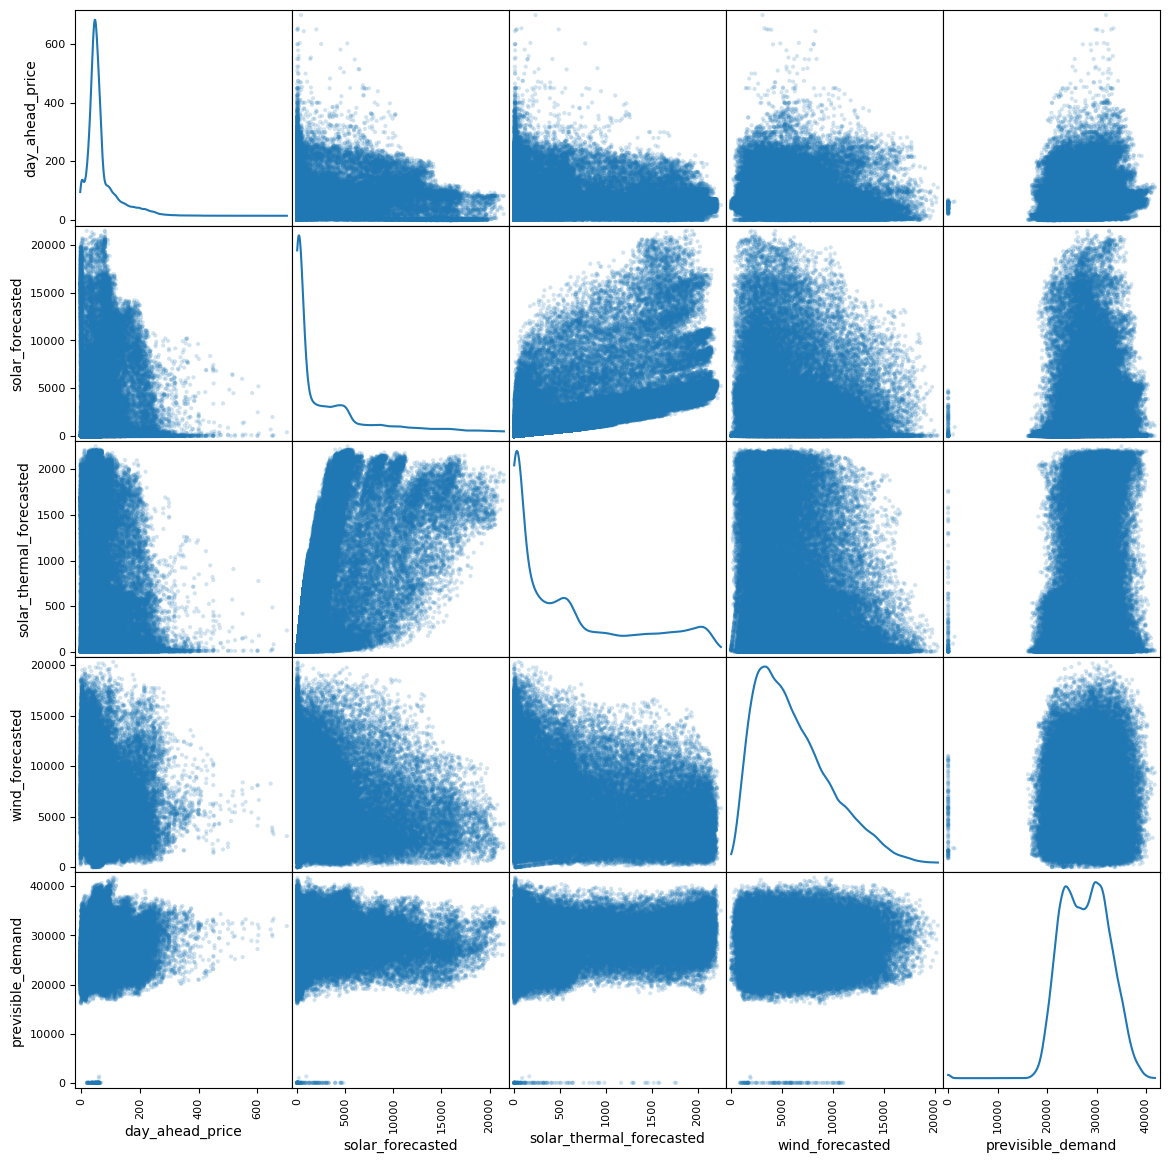

In [43]:
from pandas.plotting import scatter_matrix

scatter_matrix(full_data, alpha=0.2, figsize=(14, 14), diagonal='kde', range_padding=0.05)
plt.show()


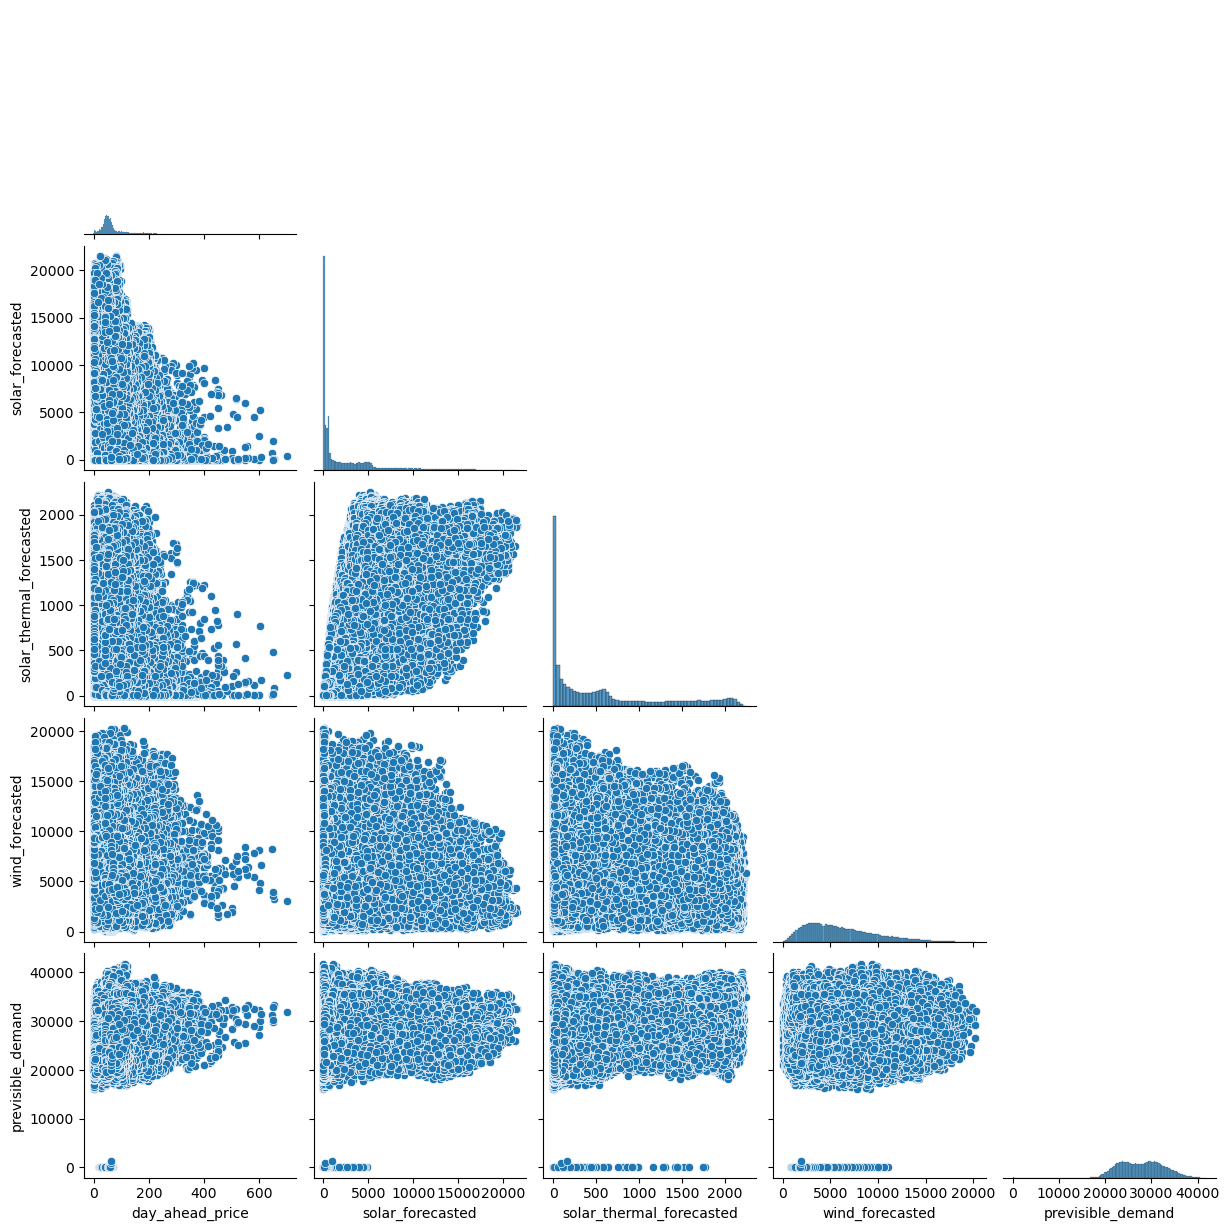

In [46]:
import seaborn as sns
sns.pairplot(full_data, corner=True)
plt.show()

In [48]:
# Calculation of correlation coefficients
corr = full_data.iloc[:,0:].corr(method='spearman')  # method{‘pearson’, ‘kendall’, ‘spearman’} 
corr

,day_ahead_price,solar_forecasted,solar_thermal_forecasted,wind_forecasted,previsible_demand
day_ahead_price,1.000000,0.052498,0.011213,-0.223985,0.240764
solar_forecasted,0.052498,1.000000,0.850476,-0.179977,0.371599
solar_thermal_forecasted,0.011213,0.850476,1.000000,-0.244695,0.313989
wind_forecasted,-0.223985,-0.179977,-0.244695,1.000000,0.000481
previsible_demand,0.240764,0.371599,0.313989,0.000481,1.000000


Create new time features from the dataset

In [54]:
full_data['year'] = full_data.index.year
full_data['month'] = full_data.index.month
full_data['hour'] = full_data.index.hour
full_data

,day_ahead_price,solar_forecasted,solar_thermal_forecasted,wind_forecasted,previsible_demand,year,month,hour
2014-01-01 00:00:00,20.02,3.500,3.500,10790.00,23878.333333,2014,1,0
2014-01-01 01:00:00,10.34,0.000,0.000,10885.00,23322.000000,2014,1,1
2014-01-01 02:00:00,5.35,0.000,0.000,10984.00,21711.166667,2014,1,2
2014-01-01 03:00:00,5.00,0.500,0.500,10680.00,20230.333333,2014,1,3
2014-01-01 04:00:00,0.50,2.200,2.200,10605.00,19215.333333,2014,1,4
...,...,...,...,...,...,...,...,...
2024-10-12 19:00:00,92.08,427.825,148.325,3780.25,24692.500000,2024,10,19
2024-10-12 20:00:00,119.93,134.200,134.200,3533.75,26107.916667,2024,10,20
2024-10-12 21:00:00,117.10,127.250,127.250,3954.25,25884.500000,2024,10,21
2024-10-12 22:00:00,105.62,122.525,122.525,3809.50,24237.583333,2024,10,22


# Histogram plotting of prices


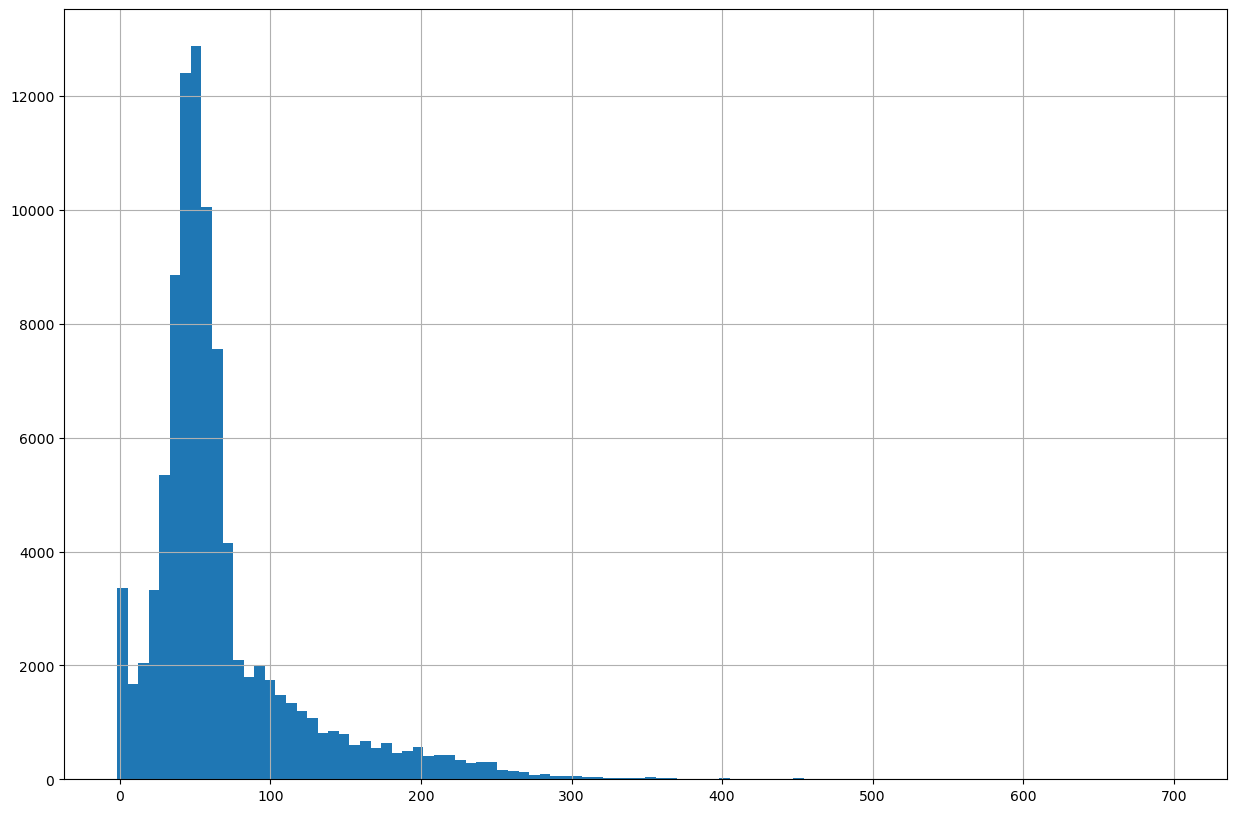

In [56]:
histogram = full_data['day_ahead_price'].hist(xlabelsize=10, ylabelsize=10, bins=100, figsize=(15, 10))

For each year

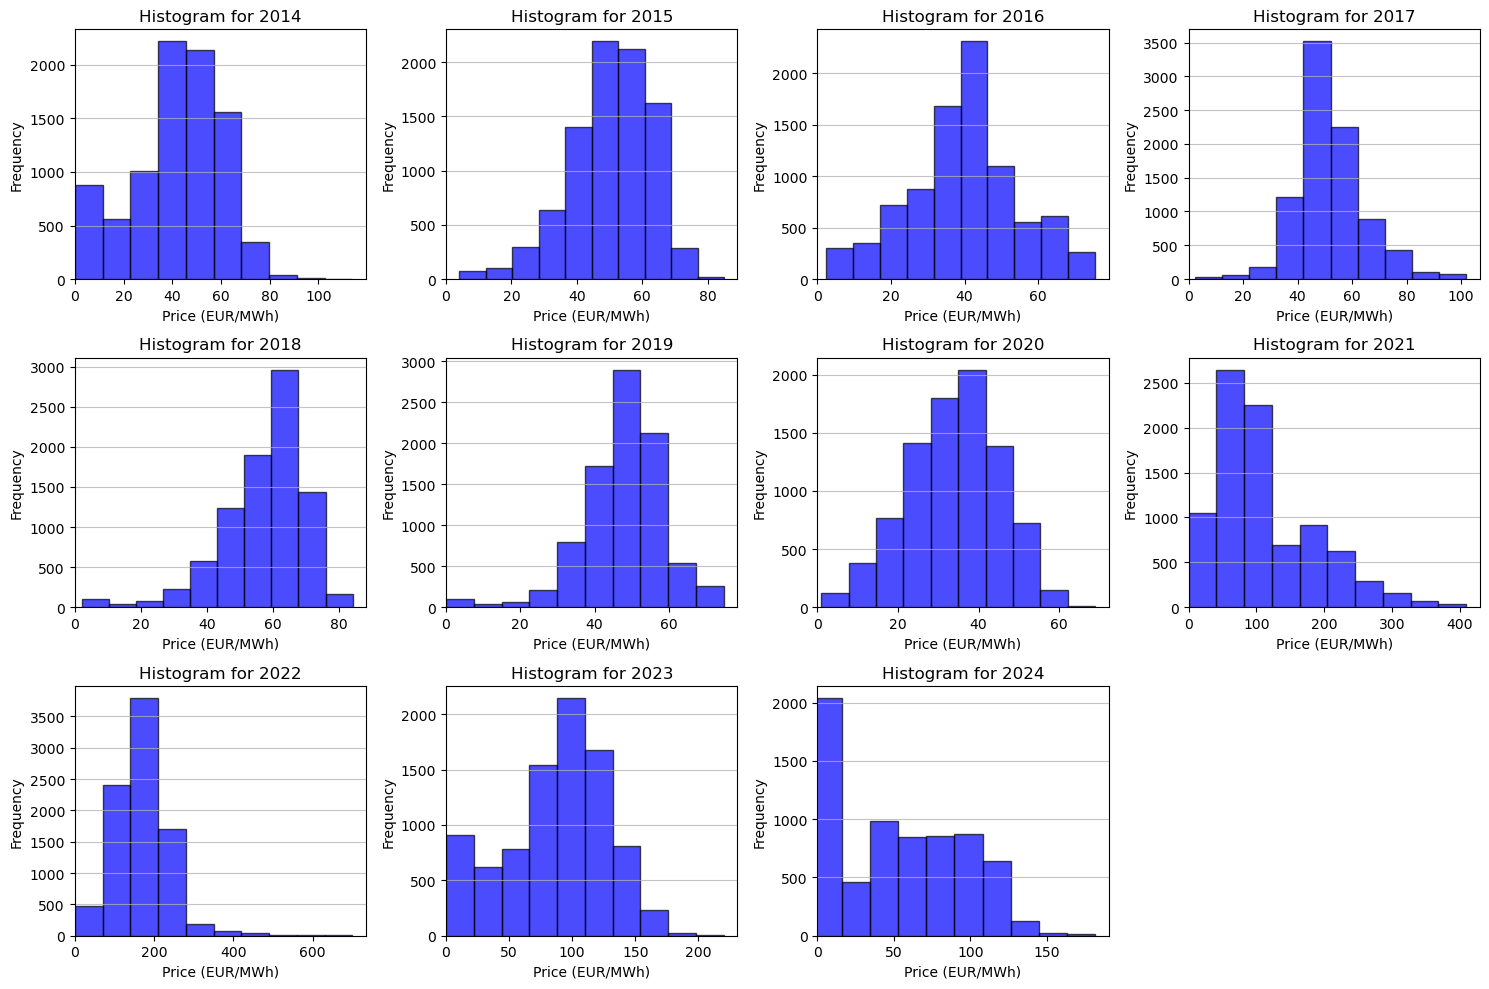

In [58]:
years = range(2014, 2025)  # Including 2024

plt.figure(figsize=(15, 10))

for year in years:
    plt.subplot(3, 4, year - 2013)  # Create a 3x4 grid of subplots
    plt.hist(full_data[full_data['year'] == year]['day_ahead_price'], bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Histogram for {year}')
    plt.xlabel('Price (EUR/MWh)')
    plt.ylabel('Frequency')
    plt.xlim(left=0)  # Adjust the x-axis limit for better visibility
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

Density plots, note that the histogram varies for each year, with lower prices in 2024. Probably more recent data will be more relevant than later one...

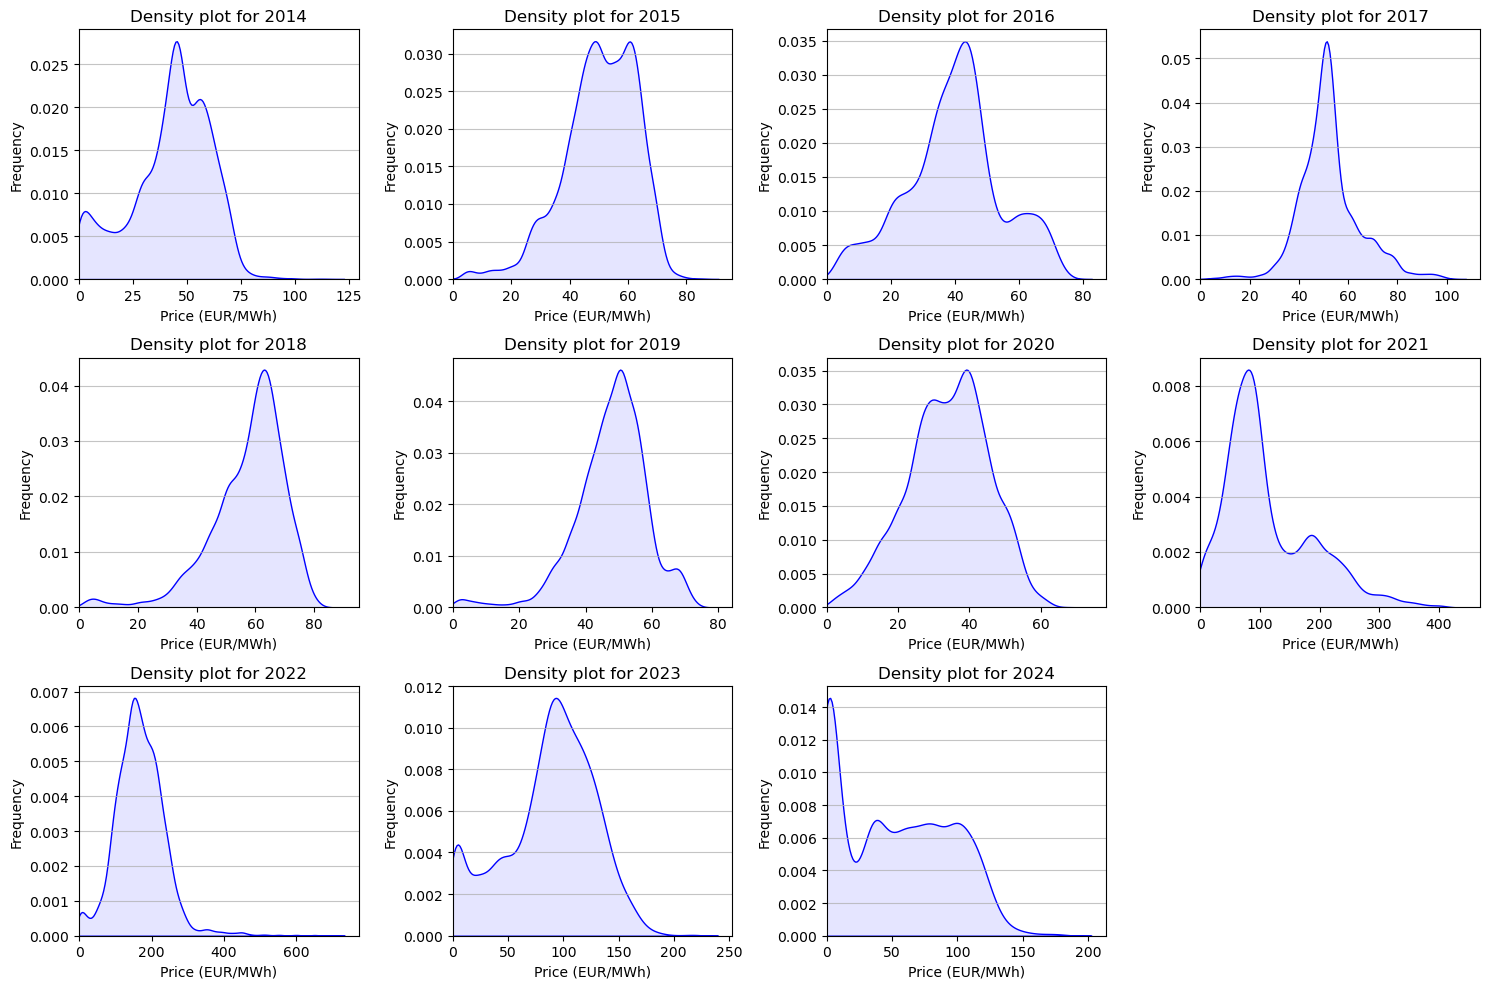

In [59]:
plt.figure(figsize=(15, 10))

for year in years:
    plt.subplot(3, 4, year - 2013)  # Create a 3x4 grid of subplots
    sns.kdeplot(data=full_data[full_data['year'] == year]['day_ahead_price'], color='blue', label='Weekday', fill=True, alpha=0.1)
    plt.title(f'Density plot for {year}')
    plt.xlabel('Price (EUR/MWh)')
    plt.ylabel('Frequency')
    plt.xlim(left=0)  # Adjust the x-axis limit for better visibility
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

## Boxplot

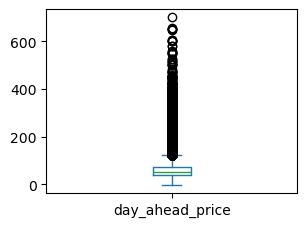

In [60]:
boxplot_attributes = full_data['day_ahead_price'].plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11),
                                 sharex=False, sharey=False, fontsize=10)

Delete outliers with IQR method (only for prices for now)

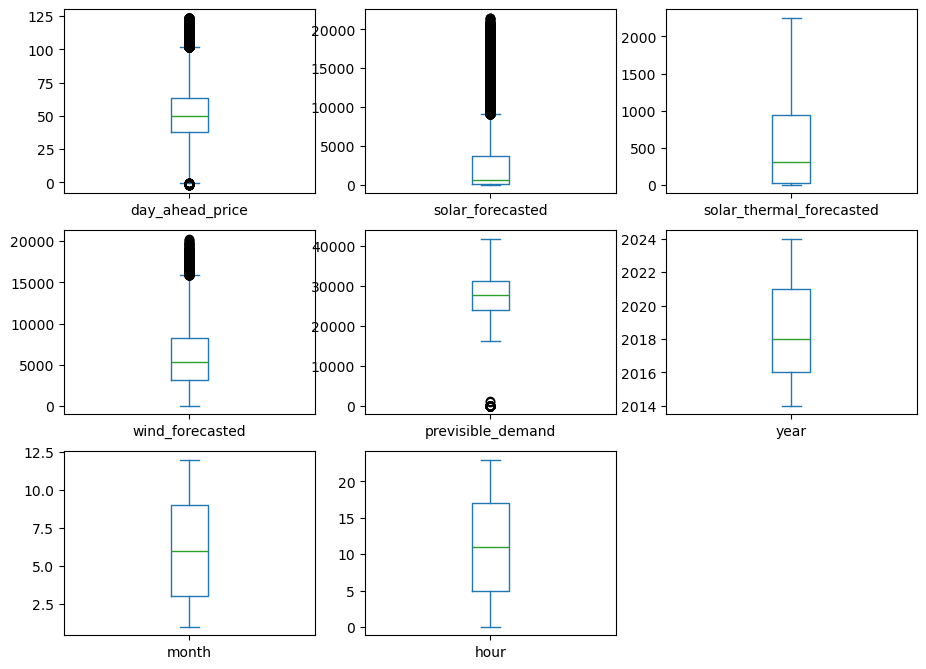

In [61]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

prices_no_outliers_iqr = remove_outliers_iqr(full_data, 'day_ahead_price')


atributos_boxplot = prices_no_outliers_iqr.plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11),
                                 sharex=False, sharey=False, fontsize=10)